In [1]:
#importing basic libraries for the analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("ecoli.data", delimiter=r"\s+", names = ["Sequence_Name", "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "class"])
df.head()

Sequence_Name   mcg   gvh   lip  chg   aac  alm1  alm2 class
0     AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1    ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2    ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3    ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4     ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp

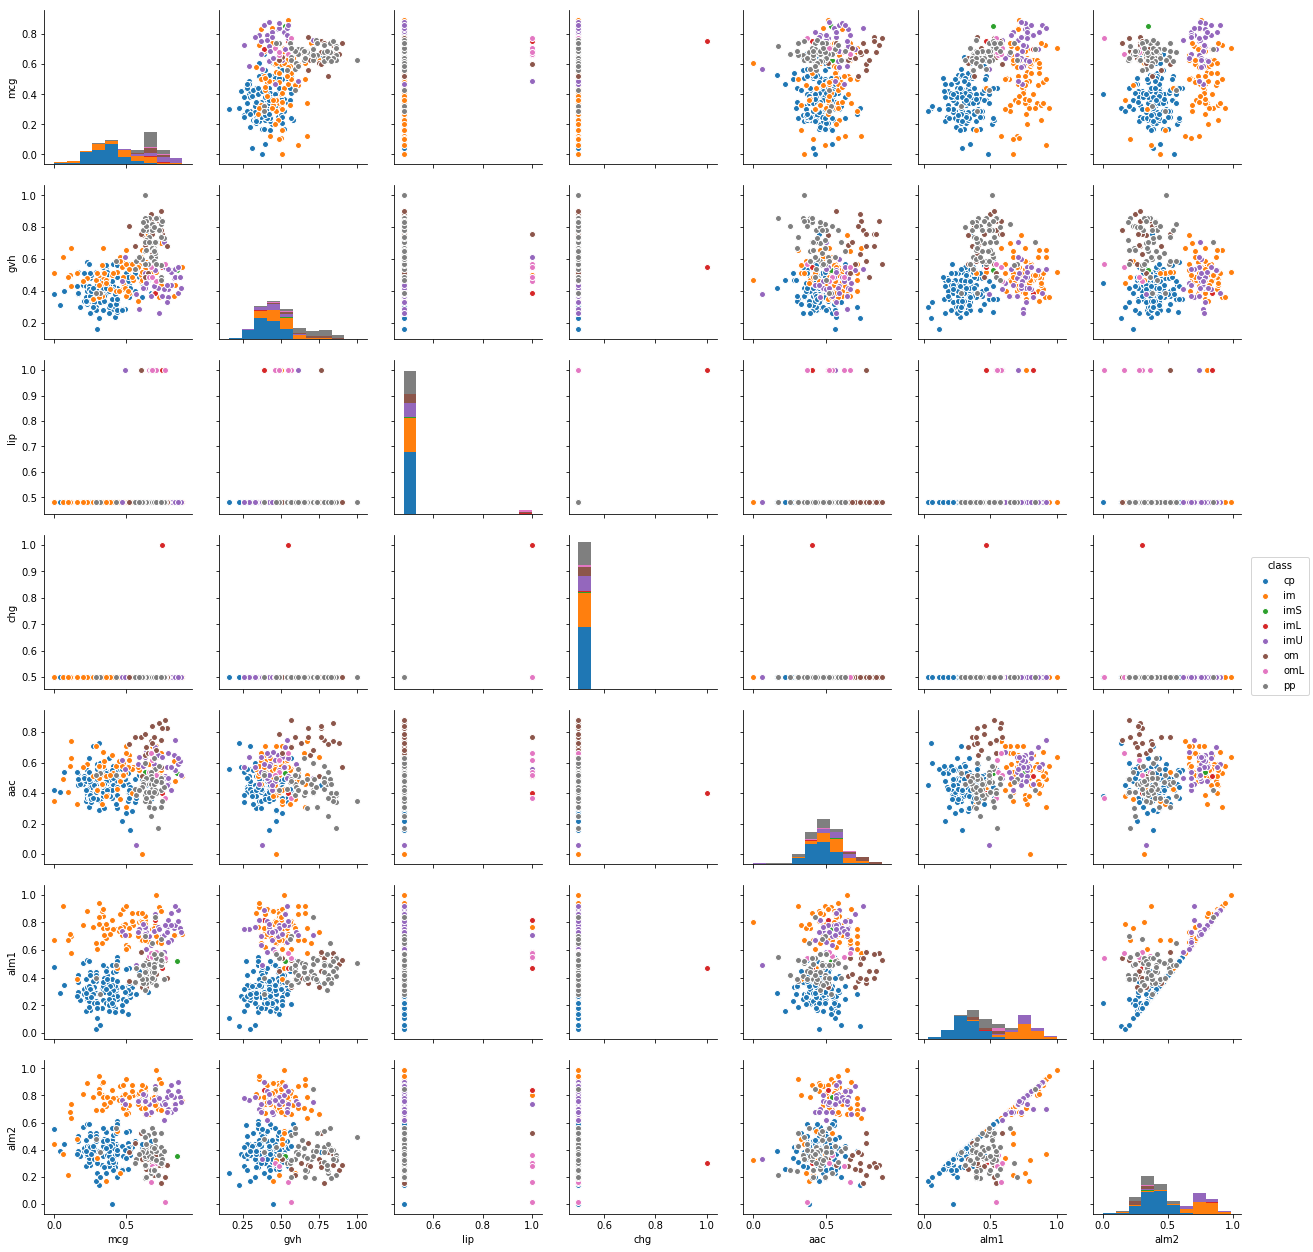

In [3]:
sns.pairplot(df, hue="class")

In [4]:
df.head(15)

Sequence_Name   mcg   gvh   lip  chg   aac  alm1  alm2 class
0      AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1     ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2     ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3     ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4      ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp
5     ALKH_ECOLI  0.67  0.39  0.48  0.5  0.36  0.38  0.46    cp
6     AMPD_ECOLI  0.29  0.28  0.48  0.5  0.44  0.23  0.34    cp
7     AMY2_ECOLI  0.21  0.34  0.48  0.5  0.51  0.28  0.39    cp
8      APT_ECOLI  0.20  0.44  0.48  0.5  0.46  0.51  0.57    cp
9     ARAC_ECOLI  0.42  0.40  0.48  0.5  0.56  0.18  0.30    cp
10    ASG1_ECOLI  0.42  0.24  0.48  0.5  0.57  0.27  0.37    cp
11    BTUR_ECOLI  0.25  0.48  0.48  0.5  0.44  0.17  0.29    cp
12    CAFA_ECOLI  0.39  0.32  0.48  0.5  0.46  0.24  0.35    cp
13    CAIB_ECOLI  0.51  0.50  0.48  0.5  0.46  0.32  0.35    cp
14     CFA_ECOLI  0.22  0.43  0.48  0.5  0.48  0.16  0.28    cp

In [5]:
df.describe()

mcg         gvh         lip         chg         aac        alm1  \
count  336.000000  336.000000  336.000000  336.000000  336.000000  336.000000   
mean     0.500060    0.500000    0.495476    0.501488    0.500030    0.500179   
std      0.194634    0.148157    0.088495    0.027277    0.122376    0.215751   
min      0.000000    0.160000    0.480000    0.500000    0.000000    0.030000   
25%      0.340000    0.400000    0.480000    0.500000    0.420000    0.330000   
50%      0.500000    0.470000    0.480000    0.500000    0.495000    0.455000   
75%      0.662500    0.570000    0.480000    0.500000    0.570000    0.710000   
max      0.890000    1.000000    1.000000    1.000000    0.880000    1.000000   

             alm2  
count  336.000000  
mean     0.499732  
std      0.209411  
min      0.000000  
25%      0.350000  
50%      0.430000  
75%      0.710000  
max      0.990000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
Sequence_Name    336 non-null object
mcg              336 non-null float64
gvh              336 non-null float64
lip              336 non-null float64
chg              336 non-null float64
aac              336 non-null float64
alm1             336 non-null float64
alm2             336 non-null float64
class            336 non-null object
dtypes: float64(7), object(2)
memory usage: 23.7+ KB


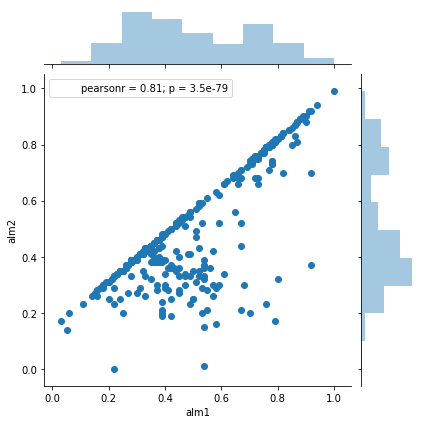

In [7]:
sns.jointplot("alm1", "alm2", data = df)

In [8]:
df = pd.get_dummies(df, prefix='Class', columns=['class'])

In [9]:
df.head()

Sequence_Name   mcg   gvh   lip  chg   aac  alm1  alm2  Class_cp  Class_im  \
0     AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35         1         0   
1    ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44         1         0   
2    ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46         1         0   
3    ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36         1         0   
4     ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35         1         0   

   Class_imL  Class_imS  Class_imU  Class_om  Class_omL  Class_pp  
0          0          0          0         0          0         0  
1          0          0          0         0          0         0  
2          0          0          0         0          0         0  
3          0          0          0         0          0         0  
4          0          0          0         0          0         0

In [10]:
X = df[["mcg","gvh","lip","chg","aac","alm1","alm2"]]
y = df["Class_cp"]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
print ("Fitting the training data into the linear regression model")
lr.fit(X_train,y_train)
print ("Predicting values of test data")
predictions = lr.predict(X_test)
print ("Printing classification report")
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

Fitting the training data into the linear regression model
Predicting values of test data
Printing classification report
             precision    recall  f1-score   support

          0       0.95      0.98      0.97        61
          1       0.97      0.93      0.95        40

avg / total       0.96      0.96      0.96       101

[[60  1]
 [ 3 37]]


In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)

In [14]:
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96        61
          1       0.93      0.95      0.94        40

avg / total       0.95      0.95      0.95       101

[[58  3]
 [ 2 38]]


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)

In [16]:
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      0.87      0.92        61
          1       0.83      0.97      0.90        40

avg / total       0.92      0.91      0.91       101

[[53  8]
 [ 1 39]]


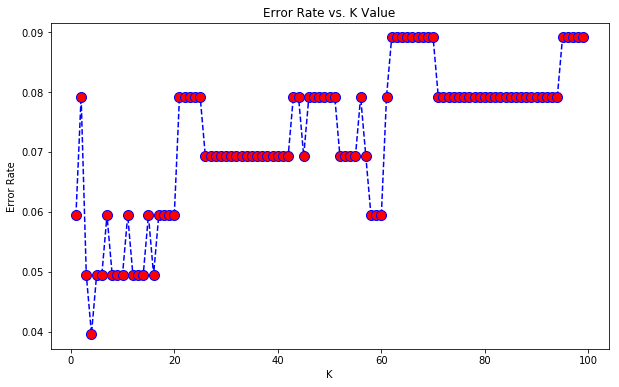

In [17]:
error_rate = []

for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97        61
          1       0.95      0.95      0.95        40

avg / total       0.96      0.96      0.96       101

[[59  2]
 [ 2 38]]


In [19]:
from sklearn.svm import SVC

In [20]:
model = SVC()

In [21]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
predictions = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test,predictions))

[[58  3]
 [ 2 38]]


In [25]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96        61
          1       0.93      0.95      0.94        40

avg / total       0.95      0.95      0.95       101

